In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [4]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,202.000000,165.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.831683,121.836364,98.848020,174.273267,65.903960,53.775248,2558.173267,126.945545,10.160990,25.148515,30.658416,13253.752475
std,1.258360,35.396412,6.094523,12.334330,2.106915,2.444769,517.236654,41.455269,3.995264,6.421956,6.809940,7954.919591
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.125000,52.000000,2174.250000,98.000000,8.600000,19.000000,25.000000,7778.250000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2417.000000,120.000000,9.000000,24.000000,30.000000,10320.000000
75%,2.000000,150.000000,102.400000,183.500000,66.825000,55.500000,2932.750000,141.000000,9.400000,30.000000,34.000000,16502.250000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


## Remove Duplicates 

In [5]:
df.duplicated().sum()

np.int64(1)

In [6]:
df.drop_duplicates(inplace = True)

## Missing Values Handle

In [7]:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [8]:
df['normalized-losses'].unique()

array([ nan, 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
       115.,  93., 142., 161., 153., 125., 128., 122., 103., 168., 108.,
       194., 231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,
        91., 134.,  65., 197.,  90.,  94., 256.,  95.])

#### find outlier

In [9]:
q1 = df['normalized-losses'].astype(float).quantile(.25)
q3 = df['normalized-losses'].astype(float).quantile(.75)
iqr = q3-q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
print('Lower:', lower, 'upper: ', upper)

Lower: 10.0 upper:  234.0


In [10]:
median_value = df['normalized-losses'].median()

In [11]:
df['normalized-losses'].fillna(median_value, inplace = True)

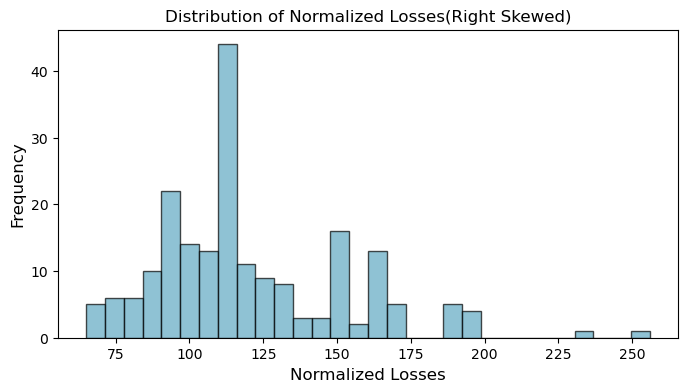

In [12]:
plt.figure(figsize = (8,4))
plt.hist(df['normalized-losses'], 
         bins = 30, 
         edgecolor = 'k', 
         alpha = .7, 
         color = '#60A9C3')
plt.xlabel('Normalized Losses', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Distribution of Normalized Losses(Right Skewed)')
plt.show()

In [13]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [14]:
df['num-of-doors'].value_counts()

num-of-doors
four    113
two      86
Name: count, dtype: int64

In [15]:
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace = True)

In [16]:
df['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [17]:
df['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.8', '3.78',
       '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

In [18]:
cols = ['bore','stroke','horsepower','peak-rpm']
for col in cols:
    df[col] = df[col].replace(['?',''], np.nan)
    df[col] = df[col].astype(float)
    df[col].fillna(df[col].median(), inplace = True)

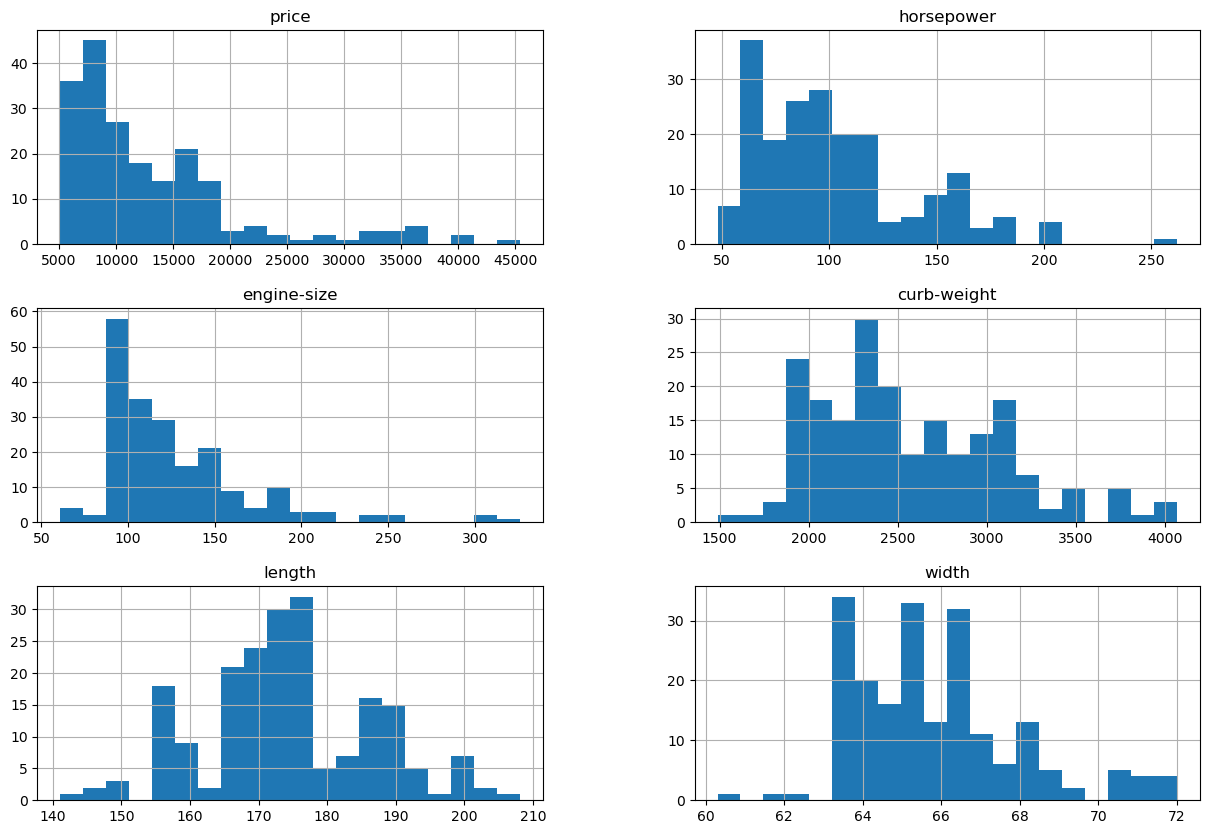

In [19]:
numeric_cols = ['price', 'horsepower', 'engine-size', 'curb-weight', 'length', 'width']
df[numeric_cols].hist(figsize=(15, 10), bins=20)
plt.show()

In [20]:
q1 = df['engine-size'].astype(float).quantile(.25)
q3 = df['engine-size'].astype(float).quantile(.75)
iqr = q3-q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
print('Lower', lower, '\nUpper', upper)

Lower 33.5 
Upper 205.5


In [21]:
cols = ['engine-size', 'horsepower', 'curb-weight', 'price']
df[cols].corr()

,engine-size,horsepower,curb-weight,price
engine-size,1.000000,0.822167,0.849072,0.872335
horsepower,0.822167,1.000000,0.757961,0.810500
curb-weight,0.849072,0.757961,1.000000,0.834415
price,0.872335,0.810500,0.834415,1.000000


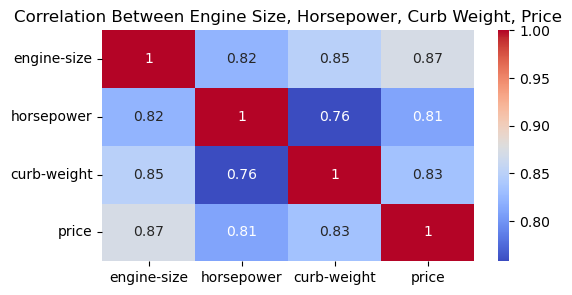

In [22]:
import seaborn as sns
plt.figure(figsize = (6,3))
sns.heatmap(df[cols].corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Between Engine Size, Horsepower, Curb Weight, Price')
plt.show()

#### The variables engine-size, horsepower, curb-weight, and price are positively correlated. Since these features increase together, the outlier values are consistent with the relationship and do not necessarily need to be treated or removed. 

## Encoding

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

In [24]:
len(df['make'].unique())

22

In [25]:
from category_encoders import BinaryEncoder

In [26]:
BinEn = BinaryEncoder(cols= ['make'])

In [27]:
df = BinEn.fit_transform(df)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 200
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make_0             201 non-null    int64  
 3   make_1             201 non-null    int64  
 4   make_2             201 non-null    int64  
 5   make_3             201 non-null    int64  
 6   make_4             201 non-null    int64  
 7   fuel-type          201 non-null    object 
 8   aspiration         201 non-null    object 
 9   num-of-doors       201 non-null    object 
 10  body-style         201 non-null    object 
 11  drive-wheels       201 non-null    object 
 12  engine-location    201 non-null    object 
 13  wheel-base         201 non-null    float64
 14  length             201 non-null    float64
 15  width              201 non-null    float64
 16  height             201 non-null

In [29]:
cols = ['fuel-type', 'aspiration', 'num-of-doors','body-style', 'drive-wheels', 'engine-location','engine-type','num-of-cylinders', 'fuel-system']
df = pd.get_dummies(df, columns = cols, drop_first = True, dtype = int)

In [30]:
df.head()

,symboling,normalized-losses,make_0,make_1,make_2,make_3,make_4,wheel-base,length,width,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115.0,0,0,0,0,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,115.0,0,0,0,0,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,115.0,0,0,0,0,1,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,2,164.0,0,0,0,1,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,0,0,0,1,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0


### Separate Features and Target

In [31]:
X = df.drop('price', axis = 1)
y = df['price']

### Split them train and test data

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

### Scaling

#### MinMaxScaler/Normalization

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
mx_scaler = MinMaxScaler()

In [36]:
X_train_mx_scaled = mx_scaler.fit_transform(X_train)
X_test_mx_scaled = mx_scaler.transform(X_test)

#### Robust Scaling

In [37]:
from sklearn.preprocessing import RobustScaler

In [38]:
rs_scaler = RobustScaler()

In [39]:
X_train_rs_scaled = rs_scaler.fit_transform(X_train)
X_test_rs_scaled = rs_scaler.fit_transform(X_test)

#### Standard Scaler / Standardization

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
std_scaler = StandardScaler()

In [42]:
X_train_std_scaled = std_scaler.fit_transform(X_train)
X_test_std_scaled = std_scaler.fit_transform(X_test)

### Model Train

#### Linear Regression with MinMaxScaler

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
linear_reg = LinearRegression()

In [45]:
linear_reg.fit(X_train_mx_scaled, y_train)

LinearRegression()

In [46]:
y_pred = linear_reg.predict(X_test_mx_scaled)

In [47]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head()

,Actual,Predicted
95,8249,5583.942689
15,41315,27219.401230
30,6855,6319.860786
158,9258,6673.035099
128,11850,13700.097567


#### Accuracy

In [48]:
linear_reg.score(X_test_mx_scaled, y_test)

0.8928364407870019

In [49]:
linear_reg.score(X_train_mx_scaled, y_train)

0.9547960493565797

#### Linear Regression with Robust Scaling

In [50]:
linear_reg.fit(X_train_rs_scaled, y_train)

LinearRegression()

In [51]:
y_pred = linear_reg.predict(X_test_rs_scaled)

In [52]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head()

,Actual,Predicted
95,8249,6167.912213
15,41315,26349.884012
30,6855,6835.838020
158,9258,7307.800384
128,11850,13723.787278


#### Accuracy

In [53]:
linear_reg.score(X_test_rs_scaled, y_test)

0.8821726565277693

In [54]:
linear_reg.score(X_train_rs_scaled, y_train)

0.9547960493565797

#### Linear Regression with Standard Scaler / Standardization


In [55]:
linear_reg.fit(X_train_std_scaled, y_train)

LinearRegression()

In [56]:
y_pred = linear_reg.predict(X_test_std_scaled)

In [57]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head()

,Actual,Predicted
95,8249,6314.711586
15,41315,23646.385899
30,6855,5764.525591
158,9258,5760.776468
128,11850,12125.441890


#### Accuracy

In [58]:
linear_reg.score(X_test_std_scaled, y_test)

0.8074192462482073

In [59]:
linear_reg.score(X_train_std_scaled, y_train)

0.9547960493565797

## KNN 

#### KNN with MinMaxScaler

In [60]:
from sklearn.neighbors import KNeighborsRegressor

In [61]:
knn_model = KNeighborsRegressor(n_neighbors= 5)

In [62]:
knn_model.fit(X_train_mx_scaled, y_train)

KNeighborsRegressor()

In [63]:
y_pred = knn_model.predict(X_test_mx_scaled)

In [64]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head()

,Actual,Predicted
95,8249,6957.0
15,41315,22865.0
30,6855,7209.4
158,9258,7680.2
128,11850,12519.0


#### Accuracy

In [65]:
knn_model.score(X_test_mx_scaled, y_test)

0.6901561462208994

In [66]:
knn_model.score(X_train_mx_scaled, y_train)

0.8506206040772895

#### KNN with Robust Scaling

In [67]:
knn_model.fit(X_train_rs_scaled, y_train)

KNeighborsRegressor()

In [68]:
y_pred = knn_model.predict(X_test_rs_scaled)

In [69]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head()

,Actual,Predicted
95,8249,7189.0
15,41315,20558.8
30,6855,6682.2
158,9258,7476.8
128,11850,14508.0


#### Accuracy

In [70]:
knn_model.score(X_test_rs_scaled, y_test)

0.5878704775394846

In [71]:
knn_model.score(X_train_rs_scaled, y_train)

0.8613905303672593

#### KNN with Standard Scaler / Standardization

In [72]:
knn_model.fit(X_train_std_scaled, y_train)

KNeighborsRegressor()

In [73]:
y_pred = knn_model.predict(X_test_std_scaled)

In [74]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head()

,Actual,Predicted
95,8249,6957.0
15,41315,22618.0
30,6855,7209.4
158,9258,7666.4
128,11850,13313.0


#### Accuracy

In [75]:
knn_model.score(X_test_std_scaled, y_test)

0.5825408842100688

In [76]:
knn_model.score(X_train_std_scaled, y_train)

0.8159829470116478